In [1]:
import json
from pprint import pprint
from datetime import datetime
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
with open('../data/raw/hltv-result.json', 'r') as f:
    data = json.load(f)

In [3]:
def parse_date(tmp_date):
    tmp_date = tmp_date.split()
    tmp_date[0] = re.sub("[^0-9]", "", tmp_date[0])
    del(tmp_date[1])
    date_string = '-'.join(tmp_date)
    datetime_object = datetime.strptime(date_string, '%d-%B-%Y')
    return datetime_object

In [4]:

fnatic_games = [game for game in data if 'fnatic' in game['team1']+game['team2']]
fnatic_games
for game in fnatic_games:
    game['date'] = parse_date(game['date'])
    print(game)


{'date': datetime.datetime(2018, 3, 25, 0, 0), 'team1': 'fnatic', 'team2': 'NiP', 'team1_players': ['Lekr0', 'flusha', 'Golden', 'JW', 'KRIMZ'], 'team2_players': ['f0rest', 'dennis', 'REZ', 'draken', 'GeT_RiGhT'], 'player_stats': {'Lekr0': {'kd': '28-17', 'pm': '+11', 'kast': '86.2%', 'rating': '1.62'}, 'flusha': {'kd': '26-17', 'pm': '+9', 'kast': '75.9%', 'rating': '1.39'}, 'Golden': {'kd': '21-15', 'pm': '+6', 'kast': '75.9%', 'rating': '1.16'}, 'JW': {'kd': '21-22', 'pm': '-1', 'kast': '69.0%', 'rating': '1.06'}, 'KRIMZ': {'kd': '17-18', 'pm': '-1', 'kast': '72.4%', 'rating': '0.97'}, 'f0rest': {'kd': '18-22', 'pm': '-4', 'kast': '62.1%', 'rating': '1.07'}, 'dennis': {'kd': '19-23', 'pm': '-4', 'kast': '65.5%', 'rating': '0.94'}, 'REZ': {'kd': '20-21', 'pm': '-1', 'kast': '55.2%', 'rating': '0.86'}, 'draken': {'kd': '16-21', 'pm': '-5', 'kast': '58.6%', 'rating': '0.80'}, 'GeT_RiGhT': {'kd': '16-26', 'pm': '-10', 'kast': '58.6%', 'rating': '0.77'}}, 'map_results': [{'map_name': 'Mi

In [25]:
sorted_list = sorted(fnatic_games, key=lambda k: k['date'])
# Calculate win ratio per month
win_loss = list()
for game in sorted_list:
    tmp = [1 if 'fnatic' in m['winner'] else 0 for m in game['map_results']]
    win_loss.append((game['date'], sum(tmp)/len(tmp)))
df = pd.DataFrame(np.array(win_loss))
df = df.set_index(0)

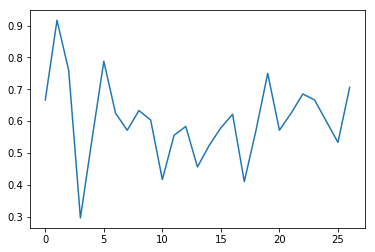

In [45]:
grouped = df.groupby(by=pd.Grouper(freq='M'))
l = list()
grouped[1].apply(lambda e: l.append(e.mean()))
plt.plot(l)